In [1]:
import pandas as pd
import numpy as np 

In [2]:
students = pd.read_csv('dataset/students.csv')
internships = pd.read_csv('dataset/internships.csv')

In [33]:
students.head()

,student_id,student_name,skills,primary_domain
0,1,Student_1,"machine learning, data science, agentic ai",Machine Learning / AI
1,2,Student_2,"dart, firebase, swift, flutter",Mobile Development
2,3,Student_3,"digital marketing, content writing, mailchimp,...",Business / Marketing
3,4,Student_4,"financial modeling, ms excel, tally, business ...",Finance / Management
4,5,Student_5,"ios, firebase, kotlin",Mobile Development


In [4]:
internships.head()

,internship_id,internship_title,company,stipend,required_skills,domain
0,1,Infrastructure As Code Intern,Skyline Corp,0,"terraform, azure, docker, gcp, infrastructure ...",DevOps / Cloud
1,2,Canva Intern,Guerrero LLC,5000,"interaction design, graphic design, photoshop,...",Design
2,3,Tensorflow Intern,Harris and Sons,15000,"agentic ai, pytorch, tensorflow, computer visi...",Machine Learning / AI
3,4,Ms Excel Intern,Singh Technologies,25000,"quickbooks, tally, accounting, ms excel, busin...",Finance / Management
4,5,Market Research Intern,Skyline Corp,0,"social media strategy, market research, hubspot",Business / Marketing


In [5]:
students["skills"] = students["skills"].str.lower()
internships["required_skills"] = internships["required_skills"].str.lower()

In [6]:
stu_skills = students.set_index('student_id')['skills'].to_dict()
int_reqs = internships.set_index('internship_id')['required_skills'].to_dict()

In [7]:
stu_skills

{1: 'machine learning, data science, agentic ai',
 2: 'dart, firebase, swift, flutter',
 3: 'digital marketing, content writing, mailchimp, hubspot',
 4: 'financial modeling, ms excel, tally, business analysis, quickbooks, accounting',
 5: 'ios, firebase, kotlin',
 6: 'canva, adobe xd, figma, interaction design, ui/ux design, illustrator',
 7: 'gen ai, agentic ai, deep learning, data science, machine learning',
 8: 'figma, ui/ux design, photoshop, adobe xd',
 9: 'sql, postgresql, flask',
 10: 'tally, business analysis, accounting, financial modeling',
 11: 'digital marketing, hubspot, seo, content writing, market research, social media strategy',
 12: 'kafka, hadoop, snowflake, spark, tableau, sql',
 13: 'airflow, tableau, powerbi, hadoop',
 14: 'adobe xd, illustrator, ui/ux design, canva, figma, photoshop',
 15: 'css, angular, html, react',
 16: 'canva, graphic design, figma, photoshop',
 17: 'swift, react native, firebase, android',
 18: 'financial modeling, accounting, risk analysis

In [8]:
import re

def clean_skills(skills):
    skills = re.sub(r'[^a-zA-Z0-9, ]', '', skills)
    skills = re.sub(r'\s+', ' ', skills)
    skills = skills.strip()
    return skills

In [9]:
for sid, skills in stu_skills.items():
    stu_skills[sid] = clean_skills(skills).split(', ')
for iid, reqs in int_reqs.items():
    int_reqs[iid] = [clean_skills(req) for req in reqs.split(', ')]

In [10]:
stu_skills

{1: ['machine learning', 'data science', 'agentic ai'],
 2: ['dart', 'firebase', 'swift', 'flutter'],
 3: ['digital marketing', 'content writing', 'mailchimp', 'hubspot'],
 4: ['financial modeling',
  'ms excel',
  'tally',
  'business analysis',
  'quickbooks',
  'accounting'],
 5: ['ios', 'firebase', 'kotlin'],
 6: ['canva',
  'adobe xd',
  'figma',
  'interaction design',
  'uiux design',
  'illustrator'],
 7: ['gen ai',
  'agentic ai',
  'deep learning',
  'data science',
  'machine learning'],
 8: ['figma', 'uiux design', 'photoshop', 'adobe xd'],
 9: ['sql', 'postgresql', 'flask'],
 10: ['tally', 'business analysis', 'accounting', 'financial modeling'],
 11: ['digital marketing',
  'hubspot',
  'seo',
  'content writing',
  'market research',
  'social media strategy'],
 12: ['kafka', 'hadoop', 'snowflake', 'spark', 'tableau', 'sql'],
 13: ['airflow', 'tableau', 'powerbi', 'hadoop'],
 14: ['adobe xd', 'illustrator', 'uiux design', 'canva', 'figma', 'photoshop'],
 15: ['css', 'ang

In [11]:
int_reqs

{1: ['terraform', 'azure', 'docker', 'gcp', 'infrastructure as code'],
 2: ['interaction design',
  'graphic design',
  'photoshop',
  'canva',
  'illustrator',
  'figma'],
 3: ['agentic ai',
  'pytorch',
  'tensorflow',
  'computer vision',
  'data science',
  'gen ai'],
 4: ['quickbooks', 'tally', 'accounting', 'ms excel', 'business analysis'],
 5: ['social media strategy', 'market research', 'hubspot'],
 6: ['android', 'firebase', 'kotlin'],
 7: ['excel', 'etl', 'tableau', 'kafka', 'sql'],
 8: ['ios', 'dart', 'swift', 'flutter', 'android', 'firebase'],
 9: ['react native', 'dart', 'swift'],
 10: ['hadoop', 'powerbi', 'tableau', 'kafka', 'etl', 'snowflake'],
 11: ['nlp', 'data science', 'deep learning', 'agentic ai', 'mlops', 'gen ai'],
 12: ['market research',
  'content writing',
  'mailchimp',
  'social media strategy',
  'digital marketing'],
 13: ['ms excel', 'business analysis', 'risk analysis', 'tally', 'quickbooks'],
 14: ['postgresql', 'flask', 'express', 'sql', 'django', 'm

In [12]:
from collections import Counter

all_stu_skills = Counter()
for skill in stu_skills.values():
    all_stu_skills.update(skill)
all_int_reqs = Counter()
for req in int_reqs.values():
    all_int_reqs.update(req)

In [13]:
all_stu_skills

Counter({'sql': 99,
         'swift': 85,
         'photoshop': 85,
         'dart': 84,
         'canva': 80,
         'adobe xd': 78,
         'uiux design': 78,
         'graphic design': 78,
         'figma': 75,
         'accounting': 73,
         'ios': 73,
         'flutter': 72,
         'risk analysis': 72,
         'quickbooks': 71,
         'snowflake': 71,
         'financial modeling': 70,
         'kotlin': 70,
         'illustrator': 70,
         'react native': 70,
         'google analytics': 69,
         'mailchimp': 68,
         'excel': 68,
         'content writing': 67,
         'seo': 67,
         'firebase': 66,
         'digital marketing': 66,
         'ms excel': 66,
         'tally': 66,
         'interaction design': 65,
         'tableau': 65,
         'android': 65,
         'agentic ai': 64,
         'hubspot': 64,
         'market research': 63,
         'pytorch': 63,
         'kafka': 62,
         'business analysis': 61,
         'terraform': 59,
   

In [14]:
all_int_reqs

Counter({'sql': 197,
         'quickbooks': 172,
         'ms excel': 171,
         'accounting': 165,
         'financial modeling': 164,
         'risk analysis': 161,
         'business analysis': 160,
         'uiux design': 160,
         'tally': 157,
         'illustrator': 155,
         'interaction design': 146,
         'adobe xd': 145,
         'tableau': 144,
         'dart': 143,
         'flutter': 142,
         'figma': 140,
         'graphic design': 137,
         'excel': 137,
         'swift': 137,
         'seo': 137,
         'canva': 135,
         'android': 135,
         'ios': 135,
         'content writing': 135,
         'react native': 134,
         'social media strategy': 133,
         'terraform': 132,
         'spark': 132,
         'google analytics': 132,
         'photoshop': 131,
         'hubspot': 131,
         'infrastructure as code': 130,
         'mailchimp': 130,
         'etl': 129,
         'aws': 129,
         'azure': 128,
         'gcp': 128

In [25]:
import matplotlib.pyplot as plt

def plot_skills(counter, title):
    skills = [skill for skill, count in counter.items()]
    counts = [count for skill, count in counter.items()]
    plt.figure(figsize=(10, 15))
    plt.barh(skills, counts, color='skyblue')
    plt.xlabel('Count')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

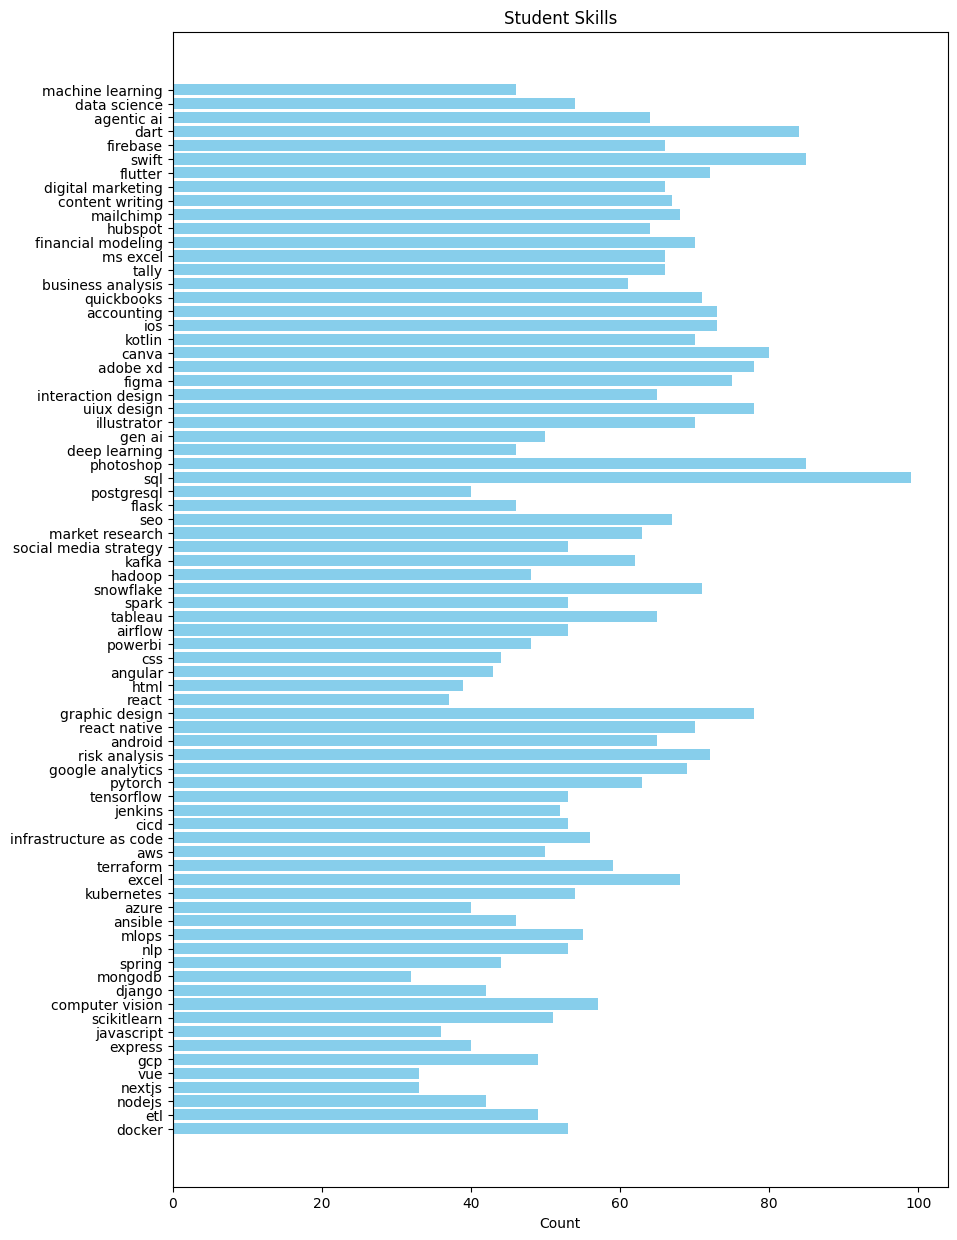

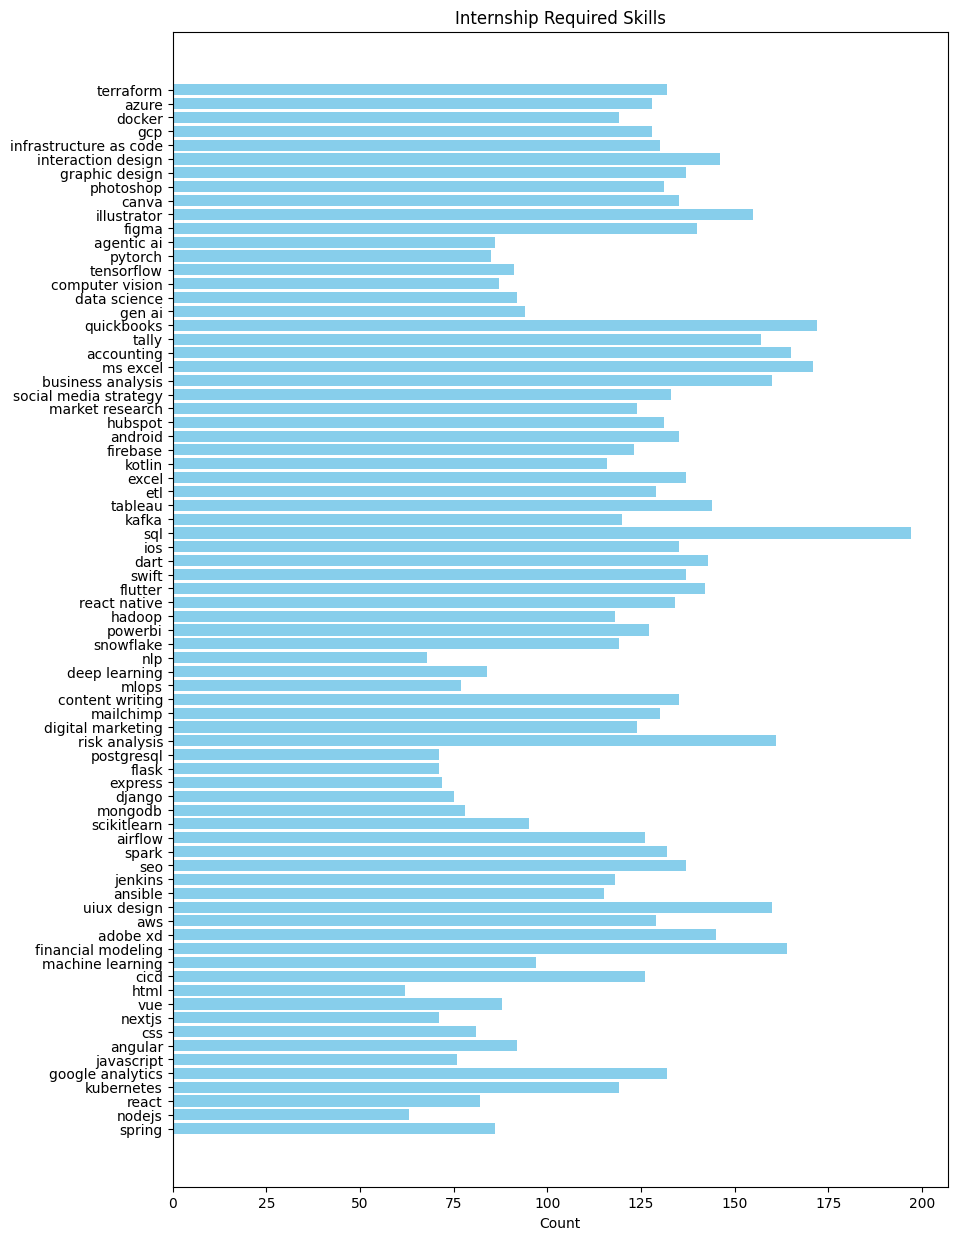

In [26]:
plot_skills(all_stu_skills, 'Student Skills')
plot_skills(all_int_reqs, 'Internship Required Skills')

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
skill_corpus = [' '.join(skills) for skills in stu_skills.values()]
X = vectorizer.fit_transform(skill_corpus)
X.shape

(1000, 92)

In [28]:
intern_reqs_corpus = [' '.join(reqs) for reqs in int_reqs.values()]
Y = vectorizer.transform(intern_reqs_corpus)
Y.shape

(2000, 92)

In [34]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(n_neighbors=5, metric='cosine')
model.fit(Y)

,n_neighbors,5
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


In [39]:
# Make predictions: Find similar internships for each student
distances, indices = model.kneighbors(X)

print("Shape of distances:", distances.shape)
print("Shape of indices:", indices.shape)
print("\nFirst student - top 5 matching internships:")
print("Distances:", distances[0])
print("Internship indices:", indices[0])

Shape of distances: (1000, 5)
Shape of indices: (1000, 5)

First student - top 5 matching internships:
Distances: [0.13637397 0.13744067 0.13816338 0.13816338 0.14123966]
Internship indices: [1400 1169 1849  457  155]


In [47]:
def create_recommendations(distances, indices, top_n=5):
    """
    Create readable recommendations: internships for each student
    """
    recommendations = {}
    
    # Get original student and internship IDs from the dataframes
    student_ids = list(students['student_id'])
    internship_ids = list(internships['internship_id'])
    
    for i, (dists, idxs) in enumerate(zip(distances, indices)):
        student_id = student_ids[i]
        student_name = students[students['student_id'] == student_id]['student_name'].iloc[0]
        
        # Get top internships for this student
        recommended_internships = []
        for j, (dist, idx) in enumerate(zip(dists[:top_n], idxs[:top_n])):
            internship_id = internship_ids[idx]
            company_name = internships[internships['internship_id'] == internship_id]['company'].iloc[0]
            similarity_score = 1 - dist  # Convert distance to similarity
            required_skills = internships[internships['internship_id'] == internship_id]['required_skills'].iloc[0]
            
            recommended_internships.append({
                'rank': j + 1,
                'internship_id': internship_id,
                'company': company_name,
                'similarity_score': similarity_score,
                'distance': dist,
                'required_skills': required_skills
            })
        
        recommendations[student_id] = {
            'student_name': student_name,
            'student_id': student_id,
            'student_skills': stu_skills[student_id],
            'internships': recommended_internships
        }
    
    return recommendations

# Create recommendations
recommendations = create_recommendations(distances, indices, top_n=5)

In [48]:
# Display recommendations for first 3 students
for i, (student_id, data) in enumerate(recommendations.items()):
    if i >= 3:  # Only show first 3 students
        break
    
    print(f"\n=== Recommendations for {data['student_name']} (ID: {student_id}) ===")
    print(f"Student Skills: {', '.join(data['student_skills'])}")
    print("Top 5 recommended internships:")
    
    for internship in data['internships']:
        print(f"  {internship['rank']}. {internship['company']} (ID: {internship['internship_id']})")
        print(f"     Similarity Score: {internship['similarity_score']:.4f}")
        print(f"     Distance: {internship['distance']:.4f}")
        print(f"     Required Skills: {internship['required_skills']}")
        print()


=== Recommendations for Student_1 (ID: 1) ===
Student Skills: machine learning, data science, agentic ai
Top 5 recommended internships:
  1. Kumar & Patel (ID: 1401)
     Similarity Score: 0.8636
     Distance: 0.1364
     Required Skills: data science, mlops, agentic ai, machine learning, pytorch

  2. Bright Future Ltd. (ID: 1170)
     Similarity Score: 0.8626
     Distance: 0.1374
     Required Skills: pytorch, data science, machine learning, tensorflow, agentic ai

  3. Mitchell, Stewart and Morris (ID: 1850)
     Similarity Score: 0.8618
     Distance: 0.1382
     Required Skills: computer vision, data science, agentic ai, machine learning

  4. Singh Technologies (ID: 458)
     Similarity Score: 0.8618
     Distance: 0.1382
     Required Skills: data science, machine learning, agentic ai, computer vision

  5. NextGen Systems (ID: 156)
     Similarity Score: 0.8588
     Distance: 0.1412
     Required Skills: nlp, mlops, machine learning, data science, agentic ai


=== Recommenda